### Import Libs

In [57]:
import matplotlib.pyplot as plt
import random
import numpy as np

### Create Individual

In [58]:
def create_individual():
    # Create a random chromosome
    return [random.randint(0, 7) for _ in range(8)]

### Generate Population

In [59]:
def generate_population(population_size=20):
    # Generate a population of individuals
    return [create_individual() for _ in range(population_size)]

### Parent Selection

In [60]:
def parent_selection(population, fitnesses):
    # Select a parent based on fitness
    total_fitness = sum(fitnesses.values())
    pick = random.uniform(0, total_fitness)
    current = 0
    for individual, fitness in fitnesses.items():
        current += fitness
        if current > pick:
            return individual

### Next Generation Selection

In [61]:
def next_generation_selection(children_population):
    # Select the next generation from the children population
    sorted_population = sorted(children_population, key=lambda x: fitness_score(x), reverse=True)
    return sorted_population[:20]

### Crossover

In [62]:
def crossover(parents):
    # Perform crossover between two parents to create offspring
    point = random.randint(1, 7)
    child1 = parents[0][:point] + parents[1][point:]
    child2 = parents[1][:point] + parents[0][point:]
    return [child1, child2]

### Mutation

In [63]:
def mutate(individual, mutation_rate=0.1):
    # Mutate an individual with a given mutation rate
    if random.random() < mutation_rate:
        mutate_point = random.randint(0, 7)
        new_value = random.randint(0, 7)
        while new_value == individual[mutate_point]:
            new_value = random.randint(0, 7)
        individual[mutate_point] = new_value
    return individual

### Score Function

In [64]:
def fitness_score(individual):
    # Calculate fitness score of an individual
    non_attacking_pairs = 0
    total_pairs = 28  # 8 choose 2
    for i in range(len(individual)):
        for j in range(i + 1, len(individual)):
            if individual[i] != individual[j] and abs(individual[i] - individual[j]) != j - i:
                non_attacking_pairs += 1
    return non_attacking_pairs / total_pairs

### Calculate Population Fitness

In [65]:
def population_fitness(population):
    # Calculate the fitness of the entire population
    individuals_fitnesses = {}
    for chromosome in population:
        fitness_sc = fitness_score(chromosome)
        individuals_fitnesses[tuple(chromosome)] = fitness_sc
    total_fitness = sum(individuals_fitnesses.values())
    return individuals_fitnesses, total_fitness

### Termination Condition

In [66]:
def check_end(population):
    # Check if the termination condition is met
    for individual in population:
        if fitness_score(individual) == 1.0:
            return True
    return False

## Generate the next generation

In [67]:
def generate_next_population(population, fitnesses):
    # Generate the next population
    new_population = []
    for _ in range(len(population)):
        parents = [list(parent_selection(population, fitnesses)) for _ in range(6)]
        for i in range(0, len(parents), 2):
            children = crossover(parents[i:i+2])
            new_population.extend([mutate(child) for child in children])
    return new_population

### Run Your Algorithms

In [68]:
generation = 0
fitness = []

population = generate_population()
individuals_fitnesses, total_fitness = population_fitness(population)

while not check_end(population):
    new_population = generate_next_population(population, individuals_fitnesses) # crossover and mutation
    population = next_generation_selection(new_population)
    individuals_fitnesses, total_fitness = population_fitness(population)

    generation += 1
    avg_fit = total_fitness / len(population)
    fitness.append(avg_fit)

### See Your Progress Over Generations

Generations: 16
Best Individual: [5, 2, 0, 7, 4, 1, 3, 6]
Fitness Score: 1.0


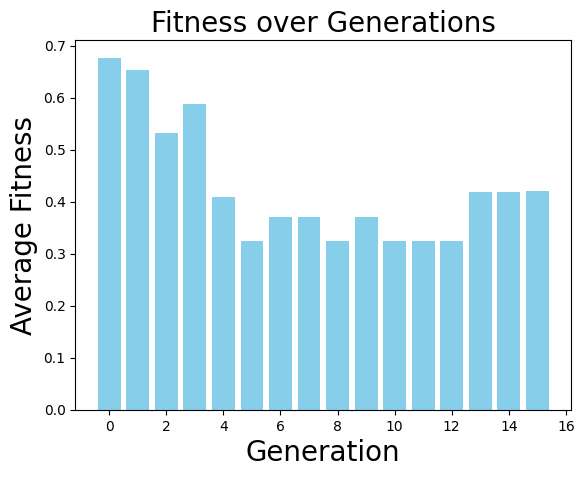

In [69]:
print(f"Generations: {generation}")
best_individual = max(population, key=lambda x: fitness_score(x))
print(f"Best Individual: {best_individual}")
print(f"Fitness Score: {fitness_score(best_individual)}")

plt.bar(range(generation), fitness, color='skyblue')
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Average Fitness', fontsize=20)
plt.title('Fitness over Generations', fontsize=20)
plt.show()

### Draw Chessboard

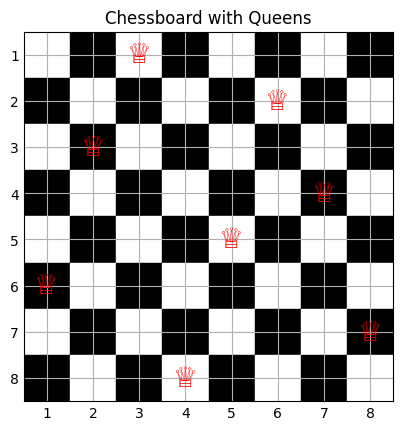

In [70]:
def draw_chessboard(board):
    # Draw the chessboard with queens
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    for i in range(8):
        for j in range(8):
            color = 'white' if (i + j) % 2 == 0 else 'black'
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))

    for col, row in enumerate(board):
        ax.text(col + 0.5, row + 0.5, '♕', fontsize=20, ha='center', va='center', color='red')

    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.set_xticks(np.arange(0.5, 8.5, 1))
    ax.set_yticks(np.arange(0.5, 8.5, 1))
    ax.set_xticklabels(range(1, 9))
    ax.set_yticklabels(range(1, 9))
    ax.tick_params(axis='both', which='both', length=0)
    ax.grid(True)
    ax.invert_yaxis()
    plt.title('Chessboard with Queens')
    plt.show()

draw_chessboard(best_individual)